In [110]:
import numpy as np
import pandas as pd
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

sales = pd.read_csv('train.csv', parse_dates = [0], date_parser = parser)

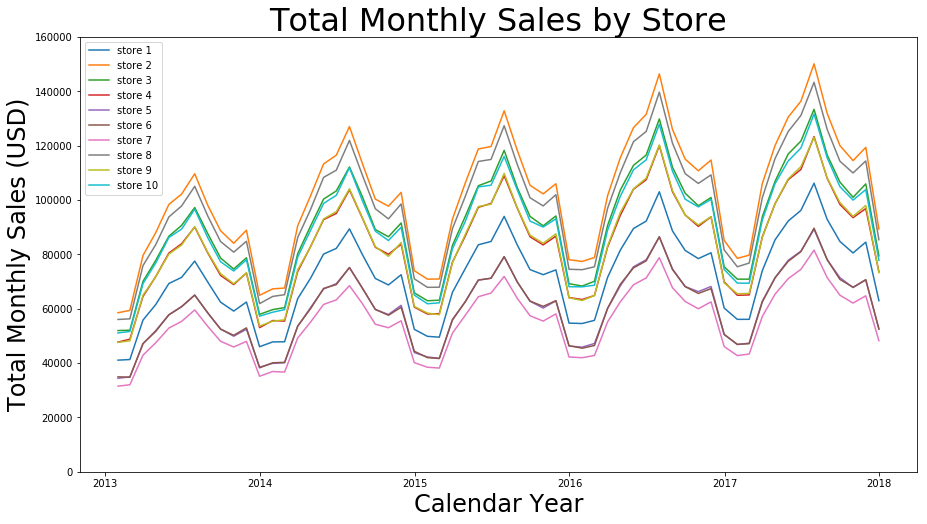

In [140]:
plt.figure(figsize=(15,8));
for i in range(1,11):
    month_df = sales[sales.store==i].resample('M',on='date').sum()
    x= np.array(month_df.index)
    y=np.array(month_df.sales)
    plt.plot(x,y,label = 'store %s' % i)
plt.legend(loc='upper left')
plt.title("Total Monthly Sales by Store", fontsize=32)
plt.ylabel("Total Monthly Sales (USD)", fontsize=24)
plt.xlabel("Calendar Year", fontsize=24)
plt.ylim(0, 160000)
plt.show()

In [145]:
sales.store = sales.store.astype(str)
sales.dtypes

date     datetime64[ns]
store            object
item              int64
sales             int64
dtype: object

In [146]:
sales.to_csv('tableau_train.csv', index=True)

In [141]:
month_df.head()

,store,item,sales
date,,,
2013-01-31,15500,39525,51095
2013-02-28,14000,35700,51624
2013-03-31,15500,39525,69249
2013-04-30,15000,38250,76791
2013-05-31,15500,39525,86210


In [56]:
sales = sales.set_index('date')
sales['month'] = sales.index.month
sales['year'] = sales.index.year
print(len(sales))
sales.head()

913000


,store,item,sales,month,year
date,,,,,
2013-01-01,1,1,13,1,2013
2013-01-02,1,1,11,1,2013
2013-01-03,1,1,14,1,2013
2013-01-04,1,1,13,1,2013
2013-01-05,1,1,10,1,2013


In [57]:
# Restructure Full Data Set

store_list = []
items_by_store = []
daily_sales_list = []
daily_diff_list = []
weekly_sales_list = []
weekly_diff_list = []
monthly_sales_list = []
monthly_diff_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales[sales.store == i]
    store_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_list:
    sales_items = i.drop(columns='sales')
    items_by_store.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_list.append(daily_sales)
    daily_diff_list.append(daily_diff)
    
# Convert our time series to weekly stationary for each store

for i in store_list:
    weekly_sales = i.reset_index().resample('W', on='date').sum()
    weekly_diff = weekly_sales.sales.diff(periods = 1)
    weekly_diff = pd.DataFrame(weekly_diff)
    weekly_diff = weekly_diff[1:]
    weekly_sales = pd.DataFrame(weekly_sales.sales)
    weekly_sales_list.append(weekly_sales)
    weekly_diff_list.append(weekly_diff)
    
    
# Convert our time series to monthly stationary for each store

for i in store_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_list.append(monthly_sales)
    monthly_diff_list.append(monthly_diff)
    

In [58]:
store1_daily_sales = daily_sales_list[0]
print(len(store1_daily_sales))
store1_daily_sales.head()

1826


,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499


In [ ]:
store1_weekly_sales = weekly_sales_list[0]
print(len(store1_weekly_sales))
store1_weekly_sales.head()

In [59]:
store1_monthly_sales = monthly_sales_list[0]
print(len(store1_monthly_sales))
store1_monthly_sales.head()

60


,sales
date,
2013-01-31,41077
2013-02-28,41306
2013-03-31,55827
2013-04-30,61523
2013-05-31,69272


In [60]:
sales_train = sales[sales.year < 2017]
print(len(sales_train))
sales_train.head()

730500


,store,item,sales,month,year
date,,,,,
2013-01-01,1,1,13,1,2013
2013-01-02,1,1,11,1,2013
2013-01-03,1,1,14,1,2013
2013-01-04,1,1,13,1,2013
2013-01-05,1,1,10,1,2013


In [61]:
sales_test = sales[sales.year == 2017]
print(len(sales_test))
sales_test.head()

182500


,store,item,sales,month,year
date,,,,,
2017-01-01,1,1,19,1,2017
2017-01-02,1,1,15,1,2017
2017-01-03,1,1,10,1,2017
2017-01-04,1,1,16,1,2017
2017-01-05,1,1,14,1,2017


In [62]:
# Restructure Train Data

store_train_list = []
items_by_store_train = []
daily_sales_train_list = []
daily_diff_train_list = []
weekly_sales_train_list = []
weekly_diff_train_list = []
monthly_sales_train_list = []
monthly_diff_train_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales_train[sales_train.store == i]
    store_train_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_train_list:
    sales_items = i.drop(columns='sales')
    items_by_store_train.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_train_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_train_list.append(daily_sales)
    daily_diff_train_list.append(daily_diff)
    
# Convert our time series to weekly stationary for each store

for i in store_train_list:
    weekly_sales = i.reset_index().resample('W', on='date').sum()
    weekly_diff = weekly_sales.sales.diff(periods = 1)
    weekly_diff = pd.DataFrame(weekly_diff)
    weekly_diff = weekly_diff[1:]
    weekly_sales = pd.DataFrame(weekly_sales.sales)
    weekly_sales_train_list.append(weekly_sales)
    weekly_diff_train_list.append(weekly_diff)
    
# Convert our time series to monthly stationary for each store

for i in store_train_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_train_list.append(monthly_sales)
    monthly_diff_train_list.append(monthly_diff)
    

In [63]:
store1_daily_sales_train = daily_sales_train_list[0]
print(len(store1_daily_sales_train))
store1_daily_sales_train.head()

1461


,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499


In [72]:
store1_weekly_sales_train = weekly_sales_train_list[0]
print(len(store1_weekly_sales_train))
store1_weekly_sales_train.tail()

209


,sales
date,
2016-12-04,15428
2016-12-11,13528
2016-12-18,13586
2016-12-25,13640
2017-01-01,11166


In [64]:
store1_monthly_sales_train = monthly_sales_train_list[0]
print(len(store1_monthly_sales_train))
store1_monthly_sales_train.head()

48


,sales
date,
2013-01-31,41077
2013-02-28,41306
2013-03-31,55827
2013-04-30,61523
2013-05-31,69272


In [65]:
# Restructure Test Data

store_test_list = []
items_by_store_test = []
daily_sales_test_list = []
daily_diff_test_list = []
weekly_sales_test_list = []
weekly_diff_test_list = []
monthly_sales_test_list = []
monthly_diff_test_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales_test[sales_test.store == i]
    store_test_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_test_list:
    sales_items = i.drop(columns='sales')
    items_by_store_test.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_test_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_test_list.append(daily_sales)
    daily_diff_test_list.append(daily_diff)
    
# Convert our time series to weekly stationary for each store

for i in store_test_list:
    weekly_sales = i.reset_index().resample('W', on='date').sum()
    weekly_diff = weekly_sales.sales.diff(periods = 1)
    weekly_diff = pd.DataFrame(weekly_diff)
    weekly_diff = weekly_diff[1:]
    weekly_sales = pd.DataFrame(weekly_sales.sales)
    weekly_sales_test_list.append(weekly_sales)
    weekly_diff_test_list.append(weekly_diff)
    
# Convert our time series to monthly stationary for each store

for i in store_test_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_test_list.append(monthly_sales)
    monthly_diff_test_list.append(monthly_diff)
    

In [66]:
store1_daily_sales_test = daily_sales_test_list[0]
print(len(store1_daily_sales_test))
store1_daily_sales_test.head()

365


,sales
date,
2017-01-01,2155
2017-01-02,1441
2017-01-03,1635
2017-01-04,1713
2017-01-05,1858


In [70]:
store1_weekly_sales_test = weekly_sales_test_list[0]
print(len(store1_weekly_sales_test))
store1_weekly_sales_test.head()

53


,sales
date,
2017-01-01,2155
2017-01-08,12767
2017-01-15,12821
2017-01-22,12644
2017-01-29,12556


In [67]:
store1_monthly_sales_test = monthly_sales_test_list[0]
print(len(store1_monthly_sales_test))
store1_monthly_sales_test.head()

12


,sales
date,
2017-01-31,56086
2017-02-28,56098
2017-03-31,74037
2017-04-30,85338
2017-05-31,92248


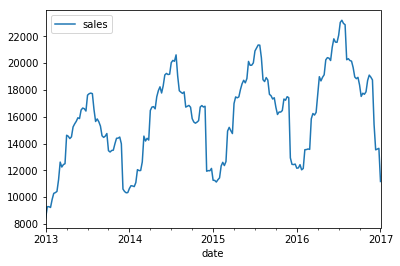

In [73]:
store1_weekly_sales_train.plot();

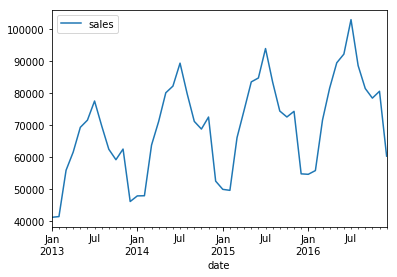

In [68]:
store1_monthly_sales_train.plot();

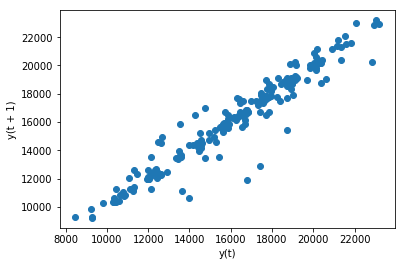

In [74]:
from pandas.plotting import lag_plot

lag_plot(store1_weekly_sales_train);

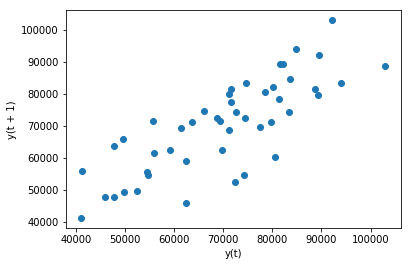

In [75]:
lag_plot(store1_monthly_sales_train);

In [76]:
# This will show us a strong positive correlation (0.96) between the observation and the lag=1 value.

series_train = store1_weekly_sales_train
values = pd.DataFrame(series_train.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.964212
t+1  0.964212  1.000000


In [77]:
# This will show us a strong positive correlation (0.80) between the observation and the lag=1 value.

series_train = store1_monthly_sales_train
values = pd.DataFrame(series_train.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.795018
t+1  0.795018  1.000000


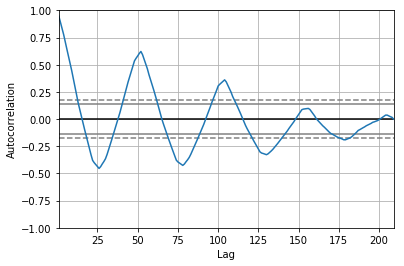

In [78]:
from pandas.plotting import autocorrelation_plot

# The autocorrelation plot will show us the swing in positive and negative correlation as the sales values 
# change across different shopping seasons from each previous year

series_train = store1_weekly_sales_train
autocorrelation_plot(series_train);

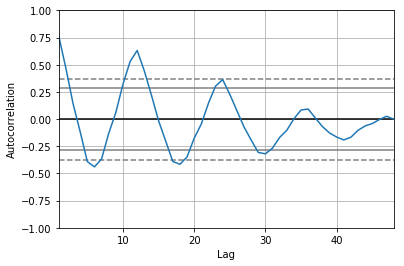

In [79]:
series_train = store1_monthly_sales_train
autocorrelation_plot(series_train);

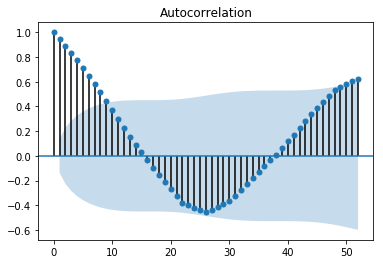

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

# Here is the statsmodels version of our autocorrelation plot

series_train = store1_weekly_sales_train
plot_acf(series_train, lags=52);

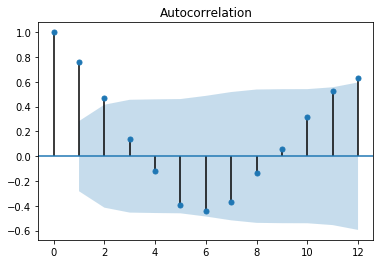

In [83]:
series_train = store1_monthly_sales_train
plot_acf(series_train, lags=12);

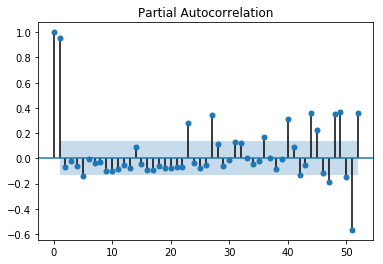

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf

# Here is the statsmodels version of our partial autocorrelation plot

series_train = store1_weekly_sales_train
plot_pacf(series_train, lags=52);

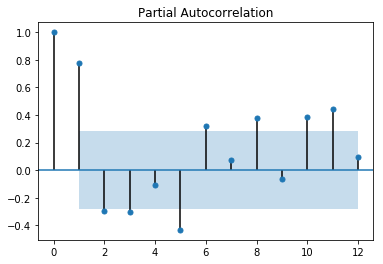

In [86]:
series_train = store1_monthly_sales_train
plot_pacf(series_train, lags=12);

In [87]:
# check weekly deviations 
print(store1_weekly_sales_train.sales.std())
print(store1_weekly_sales_train.sales.diff().std()) # d = 1 is the lowest 
print(store1_weekly_sales_train.sales.diff().diff().std()) 
print(store1_weekly_sales_train.sales.diff().diff().diff().std())

3312.472423028104
880.7899676366505
1126.6596000013171
1865.476810807349


In [22]:
# check montly deviations 
print(store1_monthly_sales_train.sales.std())
print(store1_monthly_sales_train.sales.diff().std()) # d = 1 is the lowest 
print(store1_monthly_sales_train.sales.diff().diff().std()) 
print(store1_monthly_sales_train.sales.diff().diff().diff().std())

14915.790148526356
9450.347150234456
11812.385971210484
19953.50277461999


In [88]:
# define Dickey-Fuller Test (DFT) function
import statsmodels.tsa.stattools as ts
def dickey_fuller_test(timeseries):
    dickey_fuller_test = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic           -3.001260
p-value                   0.034777
Lags Used                 4.000000
Observations Used       204.000000
Critical Value (1%)      -3.462818
Critical Value (5%)      -2.875815
Critical Value (10%)     -2.574379
dtype: float64


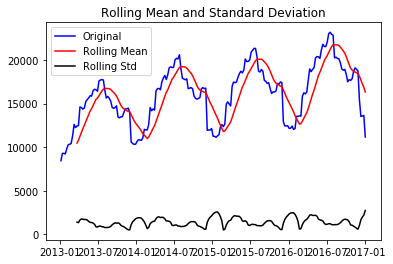

In [89]:
# P-value < 0.05 indicates that our data is stationary
dickey_fuller_test(store1_weekly_sales_train.sales)

Test Statistic          -0.883411
p-value                  0.793386
Lags Used               10.000000
Observations Used       37.000000
Critical Value (1%)     -3.620918
Critical Value (5%)     -2.943539
Critical Value (10%)    -2.610400
dtype: float64


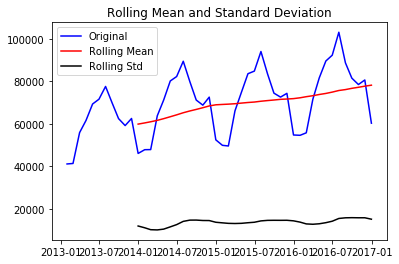

In [24]:
# P-value > 0.05 indicates that our data is non-stationary
dickey_fuller_test(store1_monthly_sales_train.sales)

In [44]:
stationary = store1_monthly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])

47


,sales
date,
2013-02-28,229.0
2013-03-31,14521.0
2013-04-30,5696.0
2013-05-31,7749.0
2013-06-30,2259.0


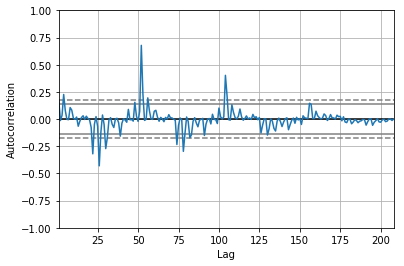

In [93]:
from pandas.plotting import autocorrelation_plot

# The autocorrelation plot of our stationarized training data

stationary = store1_weekly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
series_train = stationary
autocorrelation_plot(series_train);

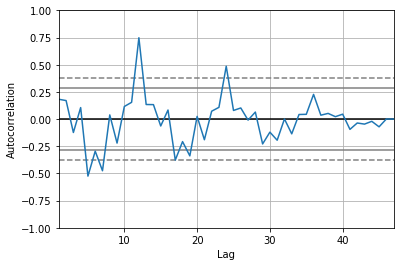

In [91]:
stationary = store1_monthly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
series_train = stationary
autocorrelation_plot(series_train);

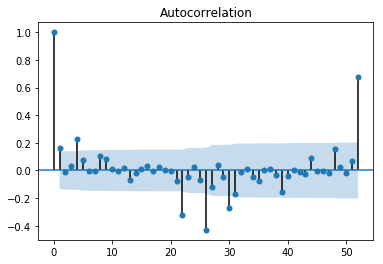

In [94]:
from statsmodels.graphics.tsaplots import plot_acf

# Here is the statsmodels version of our autocorrelation plot of stationarized training data

stationary = store1_weekly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
plot_acf(series_train, lags=52);

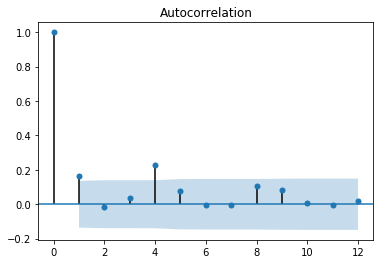

In [95]:
stationary = store1_monthly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
plot_acf(series_train, lags=12);

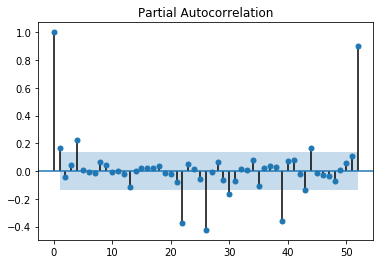

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf

# Here is the statsmodels version of our partial autocorrelation plot of stationarized training data 

stationary = store1_weekly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
plot_pacf(series_train, lags=52);

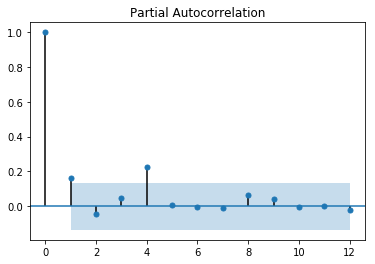

In [98]:
stationary = store1_monthly_sales_train.sales.diff()
stationary = pd.DataFrame(stationary[1:])
plot_pacf(series_train, lags=12);